In [1]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import math
import statistics as st
import cv2

In [2]:
img = '4.jpg'

1 - Conversão RGB-YIQ-RGB

In [3]:
def split_rgb(imgarr, width, height):                #SEPARA OS CANAIS RGB DA IMAGEM
    print('SEPARANDO E EXIBINDO CANAIS RGB')
    red = imgarr.copy()
    green = imgarr.copy()
    blue = imgarr.copy()

    for i in range(width):
        for j in range(height):
            red[j][i][1] = 0
            red[j][i][2] = 0
            green[j][i][0] = 0
            green[j][i][2] = 0
            blue[j][i][0] = 0
            blue[j][i][1] = 0
    
    fig = plt.figure(figsize=(30, 10))
    fig.add_subplot(1, 3, 1)
    plt.imshow(red)
    plt.axis('off')
    plt.title("Red")
    save(red, 'img_red_channel', 'jpg')

    fig.add_subplot(1, 3, 2)
    plt.imshow(green)
    plt.axis('off')
    plt.title("Green")
    save(green, 'img_green_channel', 'jpg')

    fig.add_subplot(1, 3, 3)
    plt.imshow(blue)
    plt.axis('off')
    plt.title("Blue")
    save(blue, 'img_blue_channel', 'jpg')
        
    return red, green, blue

In [4]:
def open_img(arqv):
    print('ABRINDO ARQUIVO')
    name = arqv.split(".")[0]
    filetype = arqv.split(".")[1]

    img = Image.open(arqv)
    print(img.format, img.size, img.mode)
    imgarr = np.array(img)

    fig = plt.figure(figsize=(5, 5))
    fig.add_subplot(1, 1, 1)
    plt.imshow(imgarr)
    plt.axis('off')
    plt.title("Original")

    return name, filetype, imgarr, img.size[0], img.size[1]

In [5]:
def save(arr, name, filetype):
    arqv = Image.fromarray(arr)
    arqv.save(name + '.' + filetype)

In [6]:
def rgb_yiq(red, green, blue, width, height):
    print('CONVERTENDO DE RGB PARA YIQ')
    yiq = np.zeros((height, width, 3))

    for z in range(width):
        for j in range(height):
            r = red[j][z][0]
            g = green[j][z][1]
            b = blue[j][z][2]

            y = (0.299*r) + (0.587*g) + (0.114*b)
            i = (0.596*r) - (0.274*g) - (0.322*b)
            q = (0.211*r) - (0.523*g) + (0.312*b)

            yiq[j][z][0] = y
            yiq[j][z][1] = i
            yiq[j][z][2] = q  
    
    return yiq

In [7]:
def yiq_rgb(yiq, width, height):
    print('CONVERTENDO DE YIQ PARA RGB')
    aux = np.zeros((height, width, 3), dtype=np.uint8)

    for z in range(width):
        for j in range(height):
            y = yiq[j][z][0]
            i = yiq[j][z][1]
            q = yiq[j][z][2]

            r = y + (0.956*i) + (0.621*q)
            g = y - (0.272*i) - (0.647*q)
            b = y - (1.106*i) + (1.703*q)

            r,g,b = np.clip([r,g,b], 0, 255).astype(np.uint8)

            
            
            aux[j][z][0] = r
            aux[j][z][1] = g
            aux[j][z][2] = b

    return aux

ABRINDO ARQUIVO
JPEG (612, 358) RGB
SEPARANDO E EXIBINDO CANAIS RGB


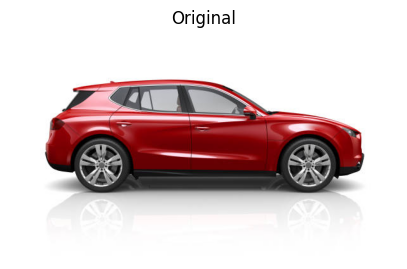

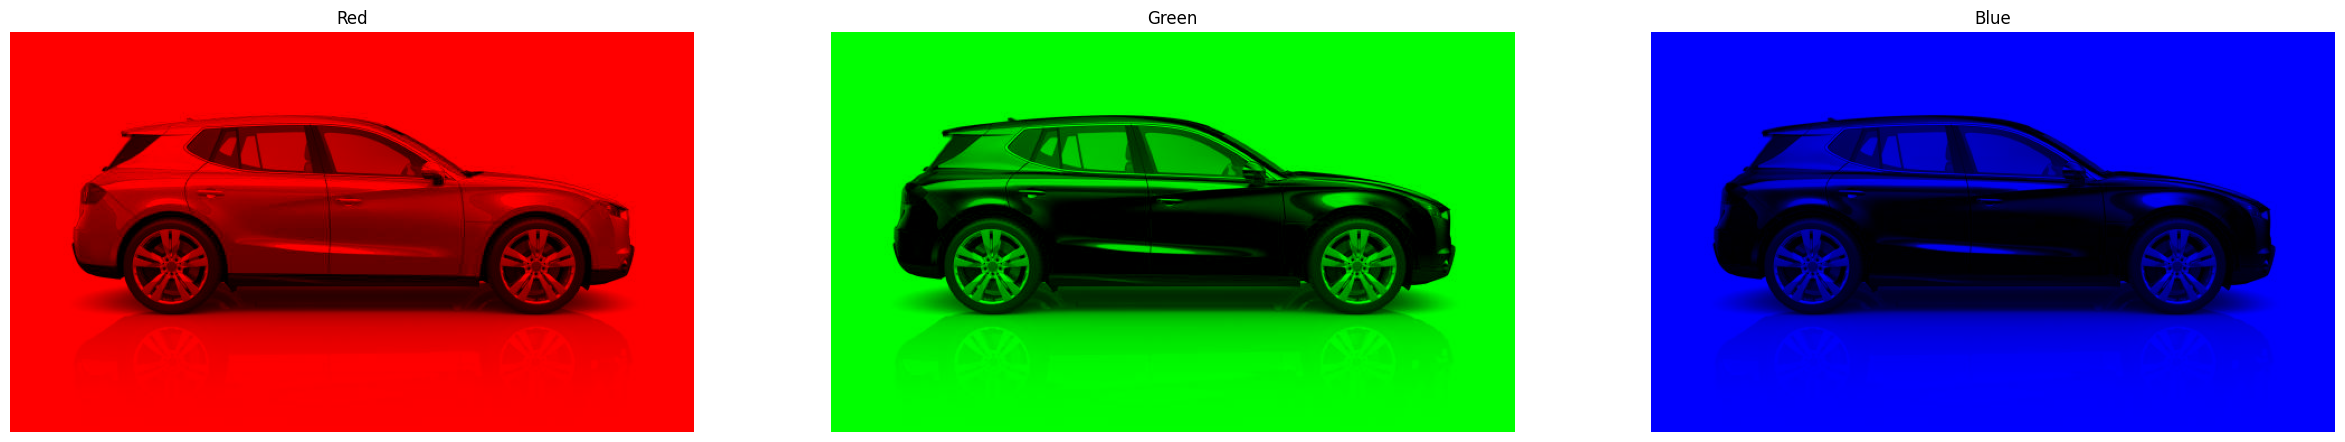

In [8]:
name, filetype, imgarr, width, height = open_img(img)  # abre arquivo

vermelho, verde, azul = split_rgb(imgarr, width, height) # separa canais rgb 

CONVERTENDO DE RGB PARA YIQ
CONVERTENDO DE YIQ PARA RGB
SEPARANDO E EXIBINDO CANAIS RGB


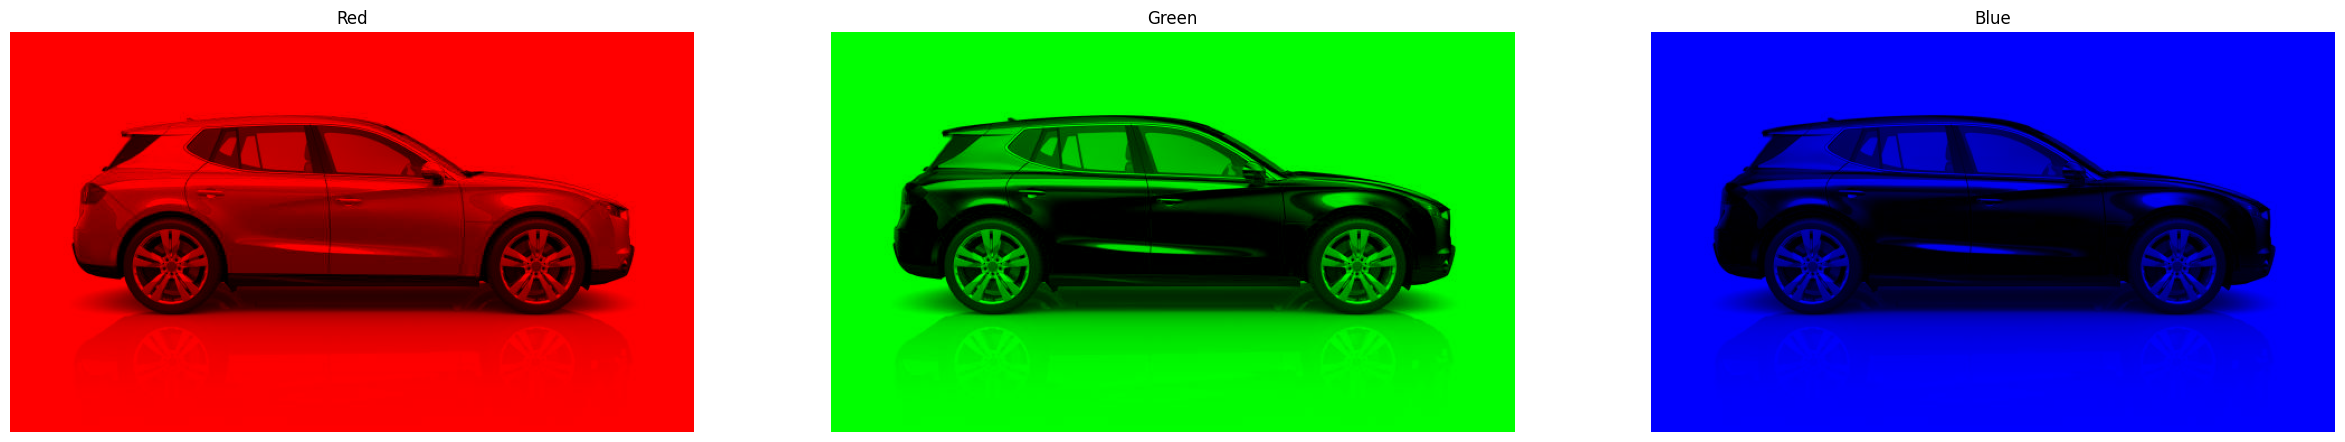

In [9]:
brilho = rgb_yiq(vermelho, verde, azul, width, height) # converte para yiq

conv = yiq_rgb(brilho, width, height) # converte para rgb

red2, green2, blue2 = split_rgb(conv, width, height) # exibe imagem resultante nos canais após a volta para rgb

2 - Negativo em R, G, B, RGB e Y

In [10]:
def negative(imgarr):
  redneg = imgarr.copy()
  greneg = imgarr.copy()
  bluneg = imgarr.copy()
  neg = imgarr.copy()

  redneg[:,:,0] = 255 - redneg[:,:,0]
  greneg[:,:,1] = 255 - greneg[:,:,1]
  bluneg[:,:,2] = 255 - bluneg[:,:,2]

  neg[:,:,0] = 255 - neg[:,:,0]
  neg[:,:,1] = 255 - neg[:,:,1]
  neg[:,:,2] = 255 - neg[:,:,2]

  fig = plt.figure(figsize=(20, 10))
  fig.add_subplot(2, 2, 1)
  plt.imshow(redneg)
  plt.axis('off')
  plt.title("Red Negative")
  save(redneg, 'img_red_negative', 'jpg')

  fig.add_subplot(2, 2, 2)
  plt.imshow(greneg)
  plt.axis('off')
  plt.title("Green Negative")
  save(greneg, 'img_green_negative', 'jpg')

  fig.add_subplot(2, 2, 3)
  plt.imshow(bluneg)
  plt.axis('off')
  plt.title("Blue Negative")
  save(bluneg, 'img_blue_negative', 'jpg')

  fig.add_subplot(2, 2, 4)
  plt.imshow(neg)
  plt.axis('off')
  plt.title("All negative")
  save(neg, 'img_negative', 'jpg')

In [11]:
def negative_y(yiq, width, height):
    aux = yiq.copy()
    aux[:,:,0] = 255 - aux[:,:,0] 

    neg_y_img = yiq_rgb(aux, width, height)

    fig = plt.figure(figsize=(5, 5))
    fig.add_subplot(1, 1, 1)
    plt.imshow(neg_y_img)
    plt.axis('off')
    plt.title("Y Negative")
    save(neg_y_img, 'img_y_negative', 'jpg')

CONVERTENDO DE YIQ PARA RGB


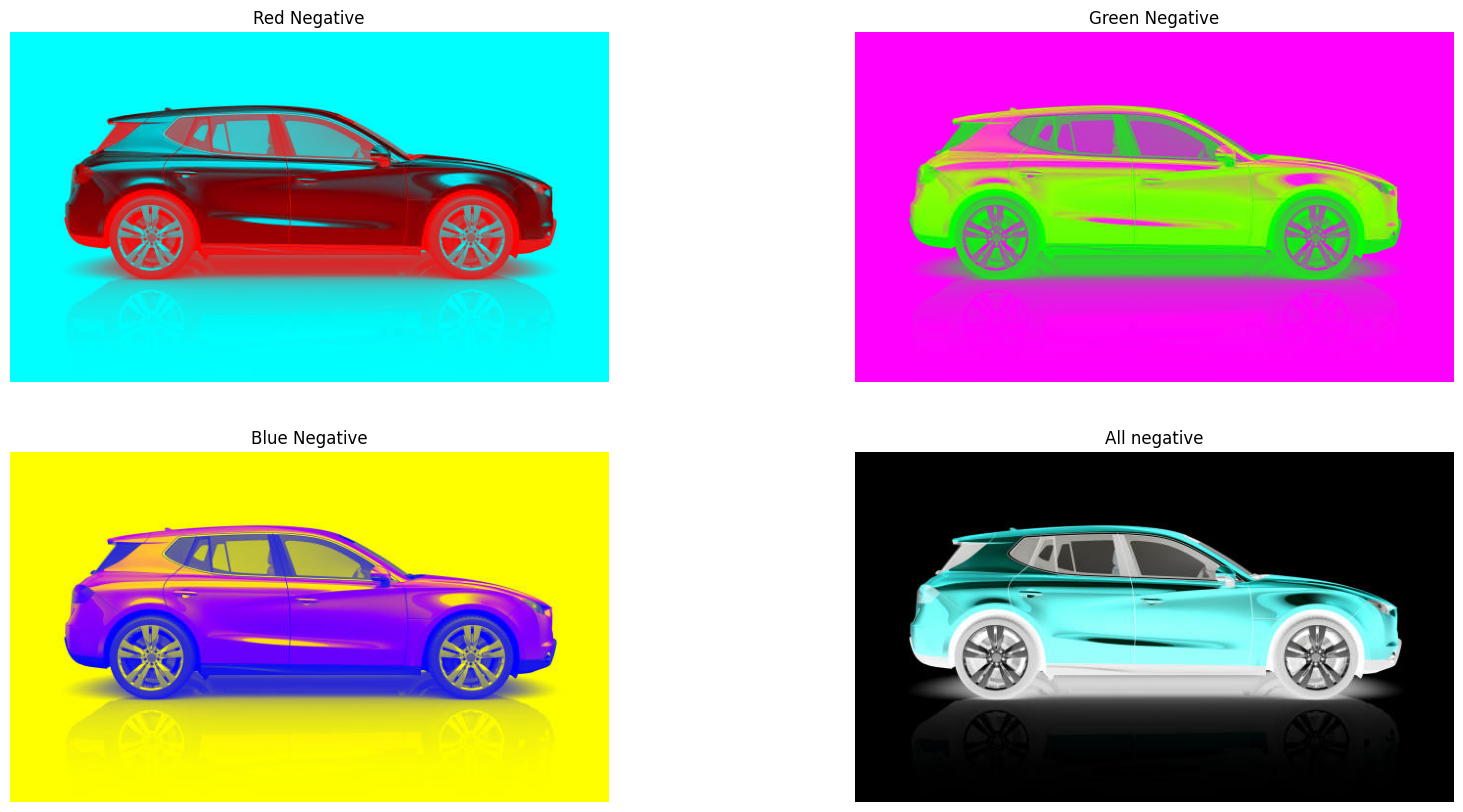

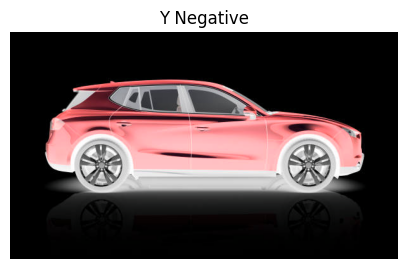

In [12]:
negative(imgarr)

negative_y(brilho, width, height)

5 - Controle de saturação no HSB

In [13]:
def rgb_hsb(imgarr,width,height):
    hsb = np.zeros((height, width, 3))

    for i in range(width):
        for j in range(height):
            r = imgarr[j,i,0]
            g = imgarr[j,i,1]
            b = imgarr[j,i,2]

            pR = r / 255
            pG = g / 255
            pB = b / 255

            high = max(pR, pG, pB)
            low = min(pR, pG, pB)
            delta = high - low

            if (delta == 0):
                hsb[j,i,0] = 0
            elif (high == pR):
                hsb[j,i,0] = (60 * (((pG  - pB) / delta) % 6))
            elif (high == pG):
                hsb[j,i,0] = (60 * (((pB  - pR) / delta) + 2))
            elif (high == pB):
                hsb[j,i,0] = (60 * (((pR  - pG) / delta) + 4))

            if (high == 0):
                hsb[j,i,1] = 0
            else:
                hsb[j,i,1] = delta / high

            hsb[j,i,2] = high

    return hsb
    

In [14]:
def hsb_rgb(hsb, width,height):
    aux = np.zeros((height, width, 3), dtype=np.uint8)
    r1 = 0
    g1 = 0
    b1 = 0

    for i in range(width):
        for j in range(height):
            h = hsb[j][i][0]
            s = hsb[j][i][1]
            b = hsb[j][i][2]

            hs = h / 60.0
            h1 = math.floor(hs)
            sext = int(h1) % 6
            f = hs - h1

            x = b * (1 - s)
            y = b * (1 - f * s)
            z = b * (1 - (1 - f) * s)

            if sext == 0:
                r1 = b
                g1 = z
                b1 = x
            elif sext == 1:
                r1 = y
                g1 = b
                b1 = x
            elif sext == 2:
                r1 = x
                g1 = b
                b1 = z
            elif sext == 3:
                r1 = x
                g1 = y
                b1 = b
            elif sext == 4:
                r1 = z
                g1 = x
                b1 = b
            elif sext == 5:
                r1 = b
                g1 = x
                b1 = y

            aux[j][i][0] = r1 * 255
            aux[j][i][1] = g1 * 255
            aux[j][i][2] = b1 * 255
            
    return aux    

In [15]:
def saturation(imgarr, width, height, num):

    hsb = rgb_hsb(imgarr, width, height)

    aux = hsb.copy()
    
    aux[:,:,1] = aux[:,:,1] * num
    
    for i in range(width):
        for j in range(height):
            if aux[j][i][1] > 1.0:
                aux[j][i][1] = 1.0

    rgb = hsb_rgb(aux, width, height)

    fig = plt.figure(figsize=(20, 10))
    fig.add_subplot(1, 2, 1)
    plt.imshow(imgarr)
    plt.axis('off')
    plt.title("Original saturation")

    fig.add_subplot(1, 2, 2)
    plt.imshow(rgb)
    plt.axis('off')
    plt.title("Saturation changed")
    save(rgb, 'img_saturation_change', 'jpg')

    return rgb

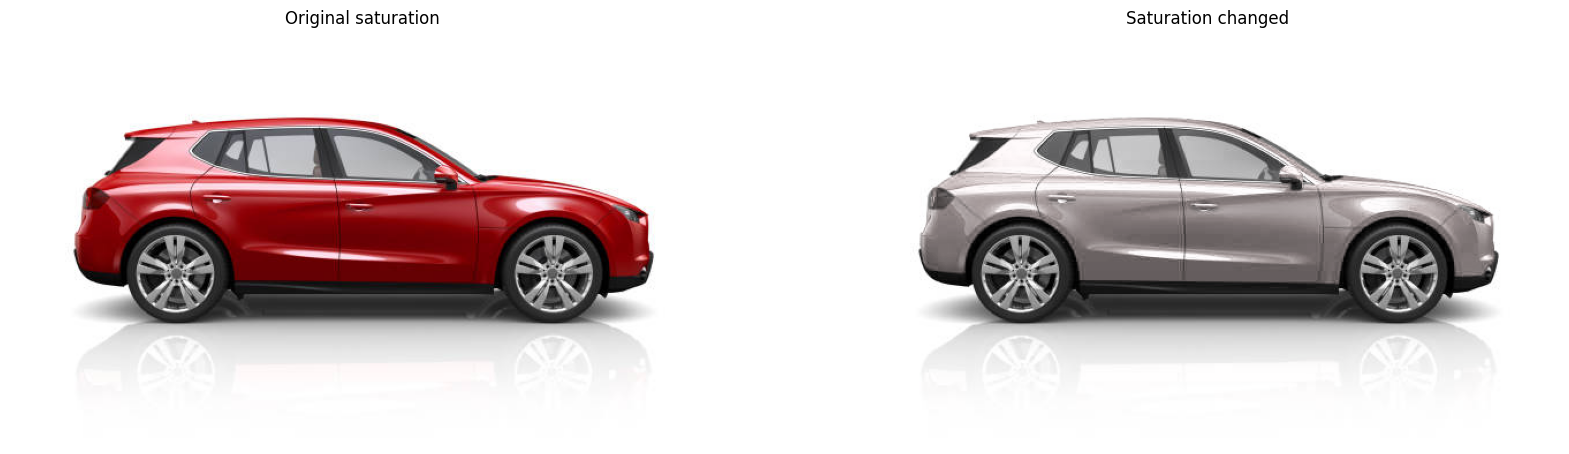

In [16]:
insatured = saturation(imgarr, width, height, 0.07)

4 - Filtro mediana mXn, com m e n ímpares, sobre R, G e B. 

In [266]:
def median_filter(imgarr, height, width, x_filter, y_filter): # considenrando inversão do numpy no height/width
    piv_x = int(x_filter/2)
    piv_y = int(y_filter/2)
    
    #Definindo limites do for com base nos valores ímpares das 
    #dimensões da mascara
    start_r = piv_x
    end_r = width - piv_x
    start_mask_x = -1 * piv_x           # pivo no meio, entao inicio é -pivo
    end_mask_x = piv_x + 1              # pivo+1 porque o for vai ate fim-1
    
    start_c = piv_y
    end_c = height - piv_y
    start_mask_y = -1 * piv_y       
    end_mask_y = piv_y + 1

    w_out = end_r - start_r
    h_out = end_c - start_c

    mask = np.zeros((x_filter, y_filter, 3), dtype=np.uint8)
    out = np.zeros((w_out, h_out, 3), dtype=np.uint8)             

    sel_r = []
    sel_g = []
    sel_b = []

    for i in range(start_r, end_r):
        for j in range(start_c, end_c):
            now_r = i - start_r
            now_c = j - start_c

            for k in range(start_mask_x, end_mask_x):
                for l in range(start_mask_y, end_mask_y):
                    r, g, b = imgarr[i-k][j-l]
                    sel_r.append(r)
                    sel_g.append(g)
                    sel_b.append(b)
            
            out[now_r][now_c][0] = st.median(sel_r) 
            out[now_r][now_c][1] = st.median(sel_g) 
            out[now_r][now_c][2] = st.median(sel_b) 
            
            sel_r = []
            sel_g = []
            sel_b = []
    
    fig = plt.figure(figsize=(5, 5))
    fig.add_subplot(1, 1, 1)
    plt.imshow(out)
    plt.axis('off')
    plt.title('Mediana')
    save(out, 'img_mediana', 'jpg')

    return out

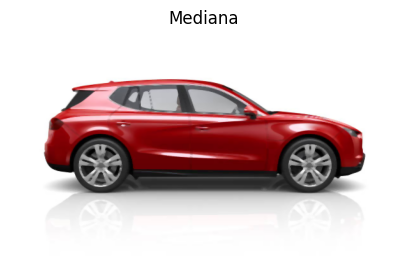

In [18]:
outImg = median_filter(imgarr, width, height, 3, 4)

3 - Correlação m x n

In [9]:
def open_txt(txt):
    file = open(txt)

    rowMask = int(file.readline())
    columnMask = int(file.readline())
    offset = int(file.readline())
    filterType = file.readline().strip()
    maskData = file.readline()
    maskData = maskData.split()
    maskData = list(map(int, maskData))

    print(f'rows: {rowMask}\ncolumns: {columnMask}\noffset: {offset}\nfilter: {filterType}')
    print(maskData)

    file.close()

    return rowMask, columnMask, filterType, maskData, offset

In [269]:
def zeroExtension(img, rowMask, columnMask):
    top = 0
    bottom = 0
    left = 0
    right = 0

    pivRow = int(rowMask/2)             # calcula posição do pivo 
    pivColumn = int(columnMask/2)

    if (rowMask%2 == 0):                # dependendo da quantidade de linhas/colunas da mascara serem pares
        top = pivRow                    # ou ímpares, decide quantas linhas com 0s vai adicionar para extensão
        bottom = pivRow - 1
    else:
        top = pivRow
        bottom = pivRow

    if (columnMask%2 == 0):
        left = pivColumn
        right = pivColumn - 1
    else:
        left= pivColumn
        right = pivColumn

    extRows = img.shape[0] + top + bottom
    extColumns = img.shape[1] + left + right

    aux = np.zeros((extRows, extColumns, 3), dtype=np.uint8)    # cria imagem com proporções maiores e zerada

    for i in range(img.shape[0]):                               # copia a imagem original para a imagem expandida
        for j in range(img.shape[1]):                           # encaixando na posição correta
            aux[pivRow + i][pivColumn + j][0] = img[i][j][0]
            aux[pivRow + i][pivColumn + j][1] = img[i][j][1]
            aux[pivRow + i][pivColumn + j][2] = img[i][j][2]
    
    save(aux, 'img_zero_extended', 'jpg')
    print((aux.shape[0], aux.shape[1]))
    
    extendedImg = aux

    return extendedImg, pivRow, pivColumn

In [270]:

def expand_histogram_with_cv2(img):
    img_sobel = img.copy()
    img_sobel = cv2.normalize(img_sobel, None, 0, 255, cv2.NORM_MINMAX)

    return img_sobel.astype(np.uint8)

In [271]:
def expand_histogram(img):
    img_sobel = img.copy()
    min_val_r, max_val_r = np.min(img_sobel[:, :, 0]), np.max(img_sobel[:, :, 0])
    min_val_g, max_val_g = np.min(img_sobel[:, :, 1]), np.max(img_sobel[:, :, 1])
    min_val_b, max_val_b = np.min(img_sobel[:, :, 2]), np.max(img_sobel[:, :, 2])

    img_range_r = int(max_val_r - min_val_r)
    img_range_g = int(max_val_g - min_val_g)
    img_range_b = int(max_val_b - min_val_b)

    for i in range(img_sobel.shape[0]):
        for j in range(img_sobel.shape[1]):
            r = np.clip(img_sobel[i][j][0] - min_val_r, 0, 255)
            g = np.clip(img_sobel[i][j][1] - min_val_g, 0, 255)
            b = np.clip(img_sobel[i][j][2] - min_val_b, 0, 255)

            r = (r * 255) / img_range_r
            g = (g * 255) / img_range_g
            b = (b * 255) / img_range_b

            img_sobel[i][j][0] = r
            img_sobel[i][j][1] = g
            img_sobel[i][j][2] = b

    img_sobel = img_sobel.astype(np.uint8)

    return img_sobel


In [272]:
def expand_histogram2(img):
    img_sobel = img.copy()
    min_val_r, max_val_r = np.min(img_sobel[:, :, 0]), np.max(img_sobel[:, :, 0])
    min_val_g, max_val_g = np.min(img_sobel[:, :, 1]), np.max(img_sobel[:, :, 1])
    min_val_b, max_val_b = np.min(img_sobel[:, :, 2]), np.max(img_sobel[:, :, 2])

    img_range_r = max_val_r - min_val_r
    img_range_g = max_val_g - min_val_g
    img_range_b = max_val_b - min_val_b
    


    for i in range(img_sobel.shape[0]):
        for j in range(img_sobel.shape[1]):
            r = img_sobel[i][j][0] - min_val_r
            g = img_sobel[i][j][1] - min_val_g
            b = img_sobel[i][j][2] - min_val_b

            if img_range_r != 0:
                r = (r * 255) / img_range_r
            else:
                r = 0
            if img_range_g != 0:
                g = (g * 255) / img_range_g
            else:
                g = 0
            if img_range_b != 0:
                b = (b * 255) / img_range_b
            else:
                b = 0

        img_sobel[i][j][0] = r
        img_sobel[i][j][1] = g
        img_sobel[i][j][2] = b

    img_sobel = img_sobel.astype(np.uint8)
    
    return img_sobel

In [273]:
def zeroExtension(img, rowMask, columnMask):
    top = 0
    bottom = 0
    left = 0
    right = 0

    pivRow = int(rowMask/2)             # calcula posição do pivo 
    pivColumn = int(columnMask/2)

    if (rowMask%2 == 0):                # dependendo da quantidade de linhas/colunas da mascara serem pares
        top = pivRow                    # ou ímpares, decide quantas linhas com 0s vai adicionar para extensão
        bottom = pivRow - 1
    else:
        top = pivRow
        bottom = pivRow

    if (columnMask%2 == 0):
        left = pivColumn
        right = pivColumn - 1
    else:
        left= pivColumn
        right = pivColumn

    extRows = img.shape[0] + top + bottom
    extColumns = img.shape[1] + left + right

    aux = np.zeros((extRows, extColumns, 3), dtype=np.uint8)    # cria imagem com proporções maiores e zerada

    for i in range(img.shape[0]):                               # copia a imagem original para a imagem expandida
        for j in range(img.shape[1]):                           # encaixando na posição correta
            aux[pivRow + i][pivColumn + j][0] = img[i][j][0]
            aux[pivRow + i][pivColumn + j][1] = img[i][j][1]
            aux[pivRow + i][pivColumn + j][2] = img[i][j][2]
    
    save(aux, 'img_zero_extended', 'jpg')
    
    extendedImg = aux.copy()

    return extendedImg, pivRow, pivColumn

In [274]:
def simpleZeroExtension(img, rowMask, columnMask):
    pivRow = (rowMask - 1) // 2
    pivColumn = (columnMask - 1) // 2

    top = pivRow
    bottom = rowMask - pivRow - 1
    left = pivColumn
    right = columnMask - pivColumn - 1

    extRows = img.shape[0] + top + bottom
    extColumns = img.shape[1] + left + right

    aux = np.zeros((extRows, extColumns, 3), dtype=np.uint8)
    aux[pivRow:pivRow+img.shape[0], pivColumn:pivColumn+img.shape[1]] = img

    return aux, pivRow, pivColumn


In [287]:
def correlation(img, txt):
    rowMask, columnMask, filterType, maskData, offset = open_txt(txt)

    if rowMask < 1 or columnMask < 1:
        print('As proporções da máscara são inválidas!')
        return

    #print(f'pivo x: {pivRow} pivo y: {pivColumn} - size: {img.shape}') 

    extendedImg, pivRow, pivColumn = zeroExtension(img, rowMask, columnMask)
    
    # Definindo limites de acesso da mascara com base nos valores das dimensões

    startRowMask = -1 * pivRow           # pivo no meio, entao inicio é -pivo
    endRowMask = pivRow                  # pivo+1 porque o for vai ate fim-1
    
    startColumnMask = -1 * pivColumn       
    endColumnMask = pivColumn

    # adicionar + 1 apenas quando for impar, pois o pivo é o meio da mascara
    if(rowMask%2 != 0):
        endRowMask += 1 
    if(columnMask%2 != 0):
        endColumnMask += 1

    print(f'row {startRowMask} / {endRowMask} column {startColumnMask} / {endColumnMask}')

    # Criando imagem de saída nas mesmas dimensões da original

    outImg = np.zeros((img.shape[0], img.shape[1], 3), dtype=np.uint8)


    inMaskReds = []         # Arrays para as componentes de cor dos pixels dentro da imagem
    inMaskGreens = []
    inMaskBlues = []
        
        
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            for k in range(startRowMask, endRowMask):
                for l in range(startColumnMask, endColumnMask):
                    #print(f' k {k} L {l}')
                    r, g, b = extendedImg[i-k][j-l]
                    inMaskReds.append(r)
                    inMaskGreens.append(g)
                    inMaskBlues.append(b)

            if (filterType == 'media' or filterType == 'box'):
                outImg[i][j][0] = int(st.mean(inMaskReds)) 
                outImg[i][j][1] = int(st.mean(inMaskGreens)) 
                outImg[i][j][2] = int(st.mean(inMaskBlues))

            elif (filterType == 'mediana'):
                outImg[i][j][0] = st.median(inMaskReds) 
                outImg[i][j][1] = st.median(inMaskGreens) 
                outImg[i][j][2] = st.median(inMaskBlues) 
            
            elif (filterType == 'soma'):
                
                outImg[i][j][0] = np.clip(np.sum(inMaskReds), 0, 255)
                outImg[i][j][1] = np.clip(np.sum(inMaskGreens), 0, 255)
                outImg[i][j][2] = np.clip(np.sum(inMaskBlues), 0, 255)
                
            elif(filterType == 'sobel'):
    
                sobelHorizontal = np.array([-1, 0, 1, -2, 0, 2, -1, 0, 1])
                sobelVertical = np.array([-1, -2, -1, 0, 0, 0, 1, 2, 1])

                dfiR = np.sum(np.multiply(inMaskReds, sobelHorizontal))
                dfjR = np.sum(np.multiply(inMaskReds, sobelVertical))

                dfiG = np.sum(np.multiply(inMaskGreens, sobelHorizontal))
                dfjG = np.sum(np.multiply(inMaskGreens, sobelVertical))

                dfiB = np.sum(np.multiply(inMaskBlues, sobelHorizontal))
                dfjB = np.sum(np.multiply(inMaskBlues, sobelVertical))

                gR = np.sqrt(np.power(dfiR,2) + np.power(dfjR,2))
                gG = np.sqrt(np.power(dfiG,2) + np.power(dfjG,2))
                gB = np.sqrt(np.power(dfiB,2) + np.power(dfjB,2))

                outImg[i][j][0] = gR
                outImg[i][j][1] = gG
                outImg[i][j][2] = gB

            elif(filterType == 'emboss'):
                embR = abs(np.sum(np.multiply(inMaskReds, maskData))) + offset
                embG = abs(np.sum(np.multiply(inMaskGreens, maskData))) + offset
                embB = abs(np.sum(np.multiply(inMaskBlues, maskData))) + offset

                outImg[i][j][0] = np.clip(embR, 0, 255)
                outImg[i][j][1] = np.clip(embG, 0, 255)
                outImg[i][j][2] = np.clip(embB, 0, 255)

            elif(filterType == 'sobel'):
                sobelVertical = [-1,-2,-1,0,0,0,1,2,1]
                sobelHorizontal = [-1,0,1,-2,0,2,-1,0,1]

                dfiR = np.sum(np.multiply(inMaskReds, sobelHorizontal))
                dfjR = np.sum(np.multiply(inMaskReds, sobelVertical))

                dfiG = np.sum(np.multiply(inMaskGreens, sobelHorizontal))
                dfjG = np.sum(np.multiply(inMaskGreens, sobelVertical))

                dfiB = np.sum(np.multiply(inMaskBlues, sobelHorizontal))
                dfjB = np.sum(np.multiply(inMaskBlues, sobelVertical))

                gR = np.sqrt(np.power(dfiR,2) + np.power(dfjR,2))
                gG = np.sqrt(np.power(dfiG,2) + np.power(dfjG,2))
                gB = np.sqrt(np.power(dfiB,2) + np.power(dfjB,2))

                outImg[i][j][0] = gR
                outImg[i][j][1] = gG
                outImg[i][j][2] = gB

            elif(filterType == 'emboss'):
                embR = abs(np.sum(np.multiply(inMaskReds, maskData))) + offset
                embG = abs(np.sum(np.multiply(inMaskGreens, maskData))) + offset
                embB = abs(np.sum(np.multiply(inMaskBlues, maskData))) + offset
                
                #print(f'r {embR} g {embG} b {embB}')

                outImg[i][j][0] = np.clip(embR, 0, 255)
                outImg[i][j][1] = np.clip(embG, 0, 255)
                outImg[i][j][2] = np.clip(embB, 0, 255)


            inMaskReds = []         # Limpa os arrays para as componentes de cor
            inMaskGreens = []
            inMaskBlues = []

    if(filterType == 'sobel'):
        outImg = expand_histogram2(outImg)
        
    fig = plt.figure(figsize=(5, 5))
    fig.add_subplot(1, 1, 1)
    plt.imshow(outImg)
    plt.axis('off')
    plt.title(filterType)
    save(outImg, 'img_' + filterType, 'jpg')

    return outImg

rows: 3
columns: 3
offset: 0
filter: sobel
[7, -7, 4, 5, 3, 4, 2, 2, 3]


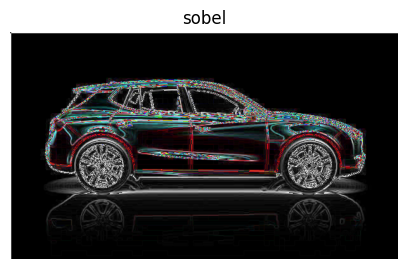

In [288]:
corr = correlation(imgarr, 'correlation_data.txt')

In [277]:
# ---------------- MAIN ----------------------- 

'''name, filetype, imgarr, width, height = open_img('2.tif')  # abre arquivo

vermelho, verde, azul = split_rgb(imgarr, width, height) # separa canais rgb

brilho = rgb_yiq(vermelho, verde, azul, width, height) # converte para yiq

conv = yiq_rgb(brilho, width, height) # converte para rgb

red2, green2, blue2 = split_rgb(conv, width, height) 

#solo_channel_img(red2, green2, blue2, 'convertido', 'jpg')

negative(imgarr)

negative_y(brilho, width, height)'''

"name, filetype, imgarr, width, height = open_img('2.tif')  # abre arquivo\n\nvermelho, verde, azul = split_rgb(imgarr, width, height) # separa canais rgb\n\nbrilho = rgb_yiq(vermelho, verde, azul, width, height) # converte para yiq\n\nconv = yiq_rgb(brilho, width, height) # converte para rgb\n\nred2, green2, blue2 = split_rgb(conv, width, height) \n\n#solo_channel_img(red2, green2, blue2, 'convertido', 'jpg')\n\nnegative(imgarr)\n\nnegative_y(brilho, width, height)"

In [278]:
def median_filter_old(imgarr, height, width, x_filter, y_filter, type): # considenrando inversão do numpy no height/width
    piv_x = int(x_filter/2)
    piv_y = int(y_filter/2)

    
    #Definindo limites do for com base nos valores ímpares das 
    #Dimensões da mascara
    
    start_r = piv_x
    end_r = width - piv_x
    start_mask_x = -1 * piv_x           # pivo no meio, entao inicio é -pivo
    end_mask_x = piv_x + 1              # pivo+1 porque o for vai ate fim-1
    
#     start_c = piv_y
#     end_c = height - piv_y
#     start_mask_y = -1 * piv_y       
#     end_mask_y = piv_y + 1

#     w_out = end_r - start_r
#     h_out = end_c - start_c

#     mask = np.zeros((x_filter, y_filter, 3), dtype=np.uint8)
#     out = np.zeros((w_out, h_out, 3), dtype=np.uint8)             

#     sel_r = []
#     sel_g = []
#     sel_b = []

#     for i in range(start_r, end_r):
#         for j in range(start_c, end_c):
#             now_r = i - start_r
#             now_c = j - start_c

#             for k in range(start_mask_x, end_mask_x):
#                 for l in range(start_mask_y, end_mask_y):
#                     r, g, b = imgarr[i-k][j-l]
#                     sel_r.append(r)
#                     sel_g.append(g)
#                     sel_b.append(b)
            
            if (type == 'mediana'):
                out[now_r][now_c][0] = st.median(sel_r) 
                out[now_r][now_c][1] = st.median(sel_g) 
                out[now_r][now_c][2] = st.median(sel_b) 

            elif (type == 'media'):
                out[now_r][now_c][0] = int(st.mean(sel_r)) 
                out[now_r][now_c][1] = int(st.mean(sel_g)) 
                out[now_r][now_c][2] = int(st.mean(sel_b))
            
            elif (type == 'soma'):
                out[now_r][now_c][0] = np.clip(sum(sel_r), 0, 255) 
                out[now_r][now_c][1] = np.clip(sum(sel_g), 0, 255)
                out[now_r][now_c][2] = np.clip(sum(sel_b), 0, 255)


#             sel_r = []
#             sel_g = []
#             sel_b = []
    
#     fig = plt.figure(figsize=(5, 5))
#     fig.add_subplot(1, 1, 1)
#     plt.imshow(out)
#     plt.axis('off')
#     plt.title(type)
#     save(out, 'img_' + type, 'jpg')

#     return out

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]

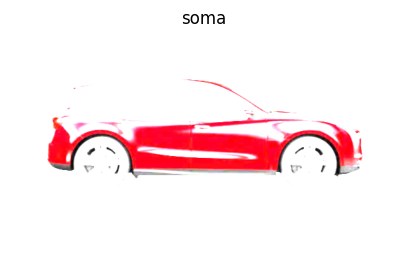

In [279]:
median_filter_old(imgarr, width, height, 3, 3, 'soma')